# Actividad
Redes neuronales completamente conectadas
aplicadas en Fashion MNIST reconocimiento de
prendas de vestir.



---
Por: Ángela Daniela Córdoba Álvarez


---




En este caso se trata el conjunto de datos Fashion MNIST (Modified National Institute of Standards and Technology) sobre imágenes de prendas de vestir en formato 28x28 píxeles en escala de grises. Cada imagen pertenece a una de las 10 categorías de prendas diferentes, que incluyen camisetas, pantalones, suéteres, vestidos, abrigos, sandalias, camisas, zapatillas, bolsos y botines.

In [1]:
import keras
# Cargar el conjunto de datos MNIST
fmnist = keras.datasets.fashion_mnist
# Cargar la división de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label: 0
Image:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  

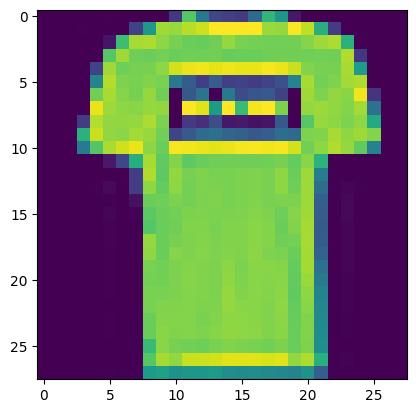

In [2]:
# Visualización de una muestra, seleccionando un índice del conjunto
import numpy as np
import matplotlib.pyplot as plt
index = 1
np.set_printoptions(linewidth=320) # Imprimir la etiqueta e imagen
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
# Visualizar la imagen
plt.imshow(training_images[index])

In [3]:
# Normalizar los valores de los datos de píxeles de las imágenes dividiendo por 255.0
# Así los valores estarán dentro del rango [0,1]
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Construir un modelo secuencial
'''
Consta de una capa de aplanamiento para convertir una imagen 2D en un vector 1D,
junto con 2 capas completamente conectadas con una función de activación ReLU y
una capa de salida softmax
'''
# Modelo de clasificación
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')])

In [5]:
# Compilar el modelo, especificando optimizador, función de pérdida y métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Entrenar el modelo con los datos de entrenamiento especificando número de épocas
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4969 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3731 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3364 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3102 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2783 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2556 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2473 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

<Axes: >

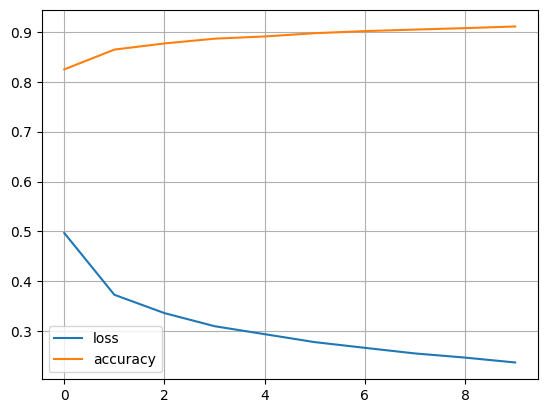

In [7]:
# Importar la biblioteca pandas
import pandas as pd

# Graficar historial de entrenamiento usando pandas para convertirlo a DataFrame
# Trazar curvas de pérdida y métricas durante entrenamiento y validación
pd.DataFrame(history.history).plot(grid=True)

In [8]:
# Evaluar el modelo en entrenamiento y prueba
# Esto proporciona la pérdida y la precisión del modelo

# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2262 - accuracy: 0.9160
Pérdida en el conjunto de entrenamiento: 0.22620569169521332
Precisión en el conjunto de entrenamiento: 0.9160000085830688
313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8829
Pérdida en el conjunto de prueba: 0.3390117883682251
Precisión en el conjunto de prueba: 0.8828999996185303


In [9]:
# Predicción de una muestra, evaluando el modelo con datos no vistos
# Imprime la etiqueta real y la clasificación predicha
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 95ms/step
Classification:
 [[1.6537395e-04]
 [7.8619404e-15]
 [9.9938869e-01]
 [1.9339565e-11]
 [3.3069443e-04]
 [1.8420803e-12]
 [1.1520216e-04]
 [1.2850431e-15]
 [3.0834627e-12]
 [6.8331557e-14]]


1/1 [==============================] - 0s 22ms/step
Etiqueta real: 9
Predicción del modelo: 9


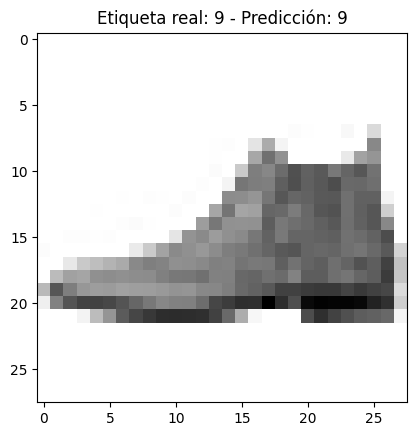

In [10]:
# Seleccionar una muestra del conjunto de prueba
sample_index = 0  # Puedes cambiar este índice para probar diferentes muestras
sample_image = test_images[sample_index]
sample_label = test_labels[sample_index]

# Realizar la predicción utilizando el modelo entrenado
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])

# Imprimir la etiqueta real y la predicción
print(f'Etiqueta real: {sample_label}')
print(f'Predicción del modelo: {predicted_label}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {sample_label} - Predicción: {predicted_label}')
plt.show()


1/1 [==============================] - 0s 23ms/step
Etiqueta real: 6
Predicción del modelo: 4


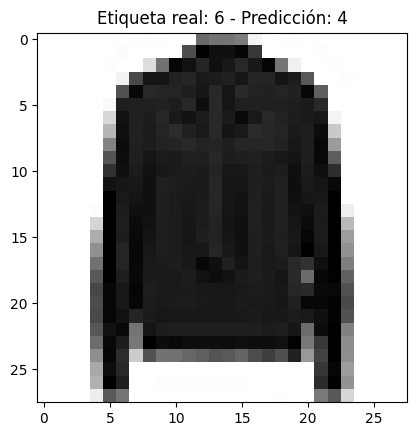

In [11]:
# Otro ejemplo con otra muestra
# Seleccionar una muestra aleatoria del conjunto de prueba
import random
random_index = random.randint(0, len(test_images) - 1)
sample_image = test_images[random_index]
sample_label = test_labels[random_index]

# Realizar la predicción utilizando el modelo entrenado
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])

# Imprimir la etiqueta real y la predicción
print(f'Etiqueta real: {sample_label}')
print(f'Predicción del modelo: {predicted_label}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {sample_label} - Predicción: {predicted_label}')
plt.show()


## Preguntas de comprensión:

1. **¿Qué conjunto de datos se utiliza y qué problema de aprendizaje automático se aborda?**
>> Se utiliza el conjunto de datos Fashion MNIST (imágenes de prendas de vestir). El problema de aprendizaje automático que se aborda es un problema de clasificación de imágenes, donde el objetivo es clasificar cada imagen en una de las 10 categorías posibles especificadas al comienzo de este notebook.

2. **¿Por qué es importante normalizar los valores de píxeles?**
>> La normalización de los valores de píxeles (escalar los valores al rango [0, 1]) es importante porque facilita el entrenamiento del modelo.

3. **¿Qué arquitectura de red neuronal se utiliza y cuántas capas tiene?**
>> La arquitectura de la red neuronal utilizada en este código es una red neuronal completamente conectada o perceptrón multicapa (MLP). Tiene tres capas en total: una capa de aplanamiento (Flatten) que convierte la imagen 2D en un vector 1D; una capa densa (Dense) con 128 neuronas y función de activación relu; una capa densa (Dense) de salida con 10 neuronas y función de activación softmax.

4. **¿Cuáles son las funciones de activación utilizadas en la capa oculta y en la capa de salida, y por qué?**
>> En la capa oculta, se utiliza la función de activación ReLU, porque introduce no linealidad en el modelo y ayuda a resolver el problema del desvanecimiento del gradiente, permitiendo que el modelo aprenda representaciones complejas.
En la capa de salida, se utiliza la función de activación softmax, porque convierte los valores de salida en probabilidades, facilitando la clasificación en una de las 10 categorías.

5. **¿Qué función de pérdida se utiliza y qué métricas se evalúan?**
>> La función de pérdida utilizada es sparse_categorical_crossentropy, que es adecuada para problemas de clasificación con etiquetas categóricas enteras y la métrica utilizada para evaluar el rendimiento del modelo es accuracy (precisión), que mide la proporción de predicciones correctas.

6. **¿Cuántas épocas se utilizan para entrenar el modelo y por qué?**
>> Se utilizan 10 épocas para entrenar el modelo, porque ayuda a evitar tanto el subajuste como el sobreajuste.

7. **¿Qué significa model.summary() y qué información proporciona?**
>> La función model.summary() imprime un resumen detallado del modelo: arquitectura del modelo, tipo y número de capas, forma de salida de cada capa, número de parámetros entrenables en cada capa y en total, por ejemplo.

## Ejercicios de exploración

#### Ejecuta la red con una muestra y observa que el resultado es una lista de números. Reflexiona sobre por qué es así y qué representan esos números:
> Los números en la lista de predicciones representan las probabilidades asignadas a cada una de las 10 posibles clases del dataset. La clase con la mayor probabilidad es la predicción del modelo para esa imagen en específico.



1/1 [==============================] - 0s 25ms/step
Etiqueta real: 2
Predicción del modelo: 2
Predicciones: [1.6537395e-04 7.8619404e-15 9.9938869e-01 1.9339565e-11 3.3069443e-04 1.8420803e-12 1.1520216e-04 1.2850431e-15 3.0834627e-12 6.8331557e-14]


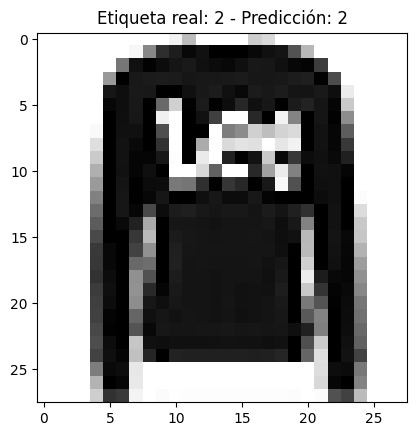

In [12]:
# Seleccionar una muestra del conjunto de prueba
sample_index = 1  # Puedes cambiar este índice para probar diferentes muestras
sample_image = test_images[sample_index]
sample_label = test_labels[sample_index]

# Realizar la predicción utilizando el modelo entrenado
predictions = model.predict(np.array([sample_image]))
predicted_label = np.argmax(predictions[0])

# Imprimir la etiqueta real y la predicción
print(f'Etiqueta real: {sample_label}')
print(f'Predicción del modelo: {predicted_label}')
print(f'Predicciones: {predictions[0]}')

# Visualizar la muestra
plt.imshow(sample_image, cmap=plt.cm.binary)
plt.title(f'Etiqueta real: {sample_label} - Predicción: {predicted_label}')
plt.show()

#### Examina las capas de tu modelo y experimenta con diferentes valores para la capa densa como 256 neuronas. Observa cómo varían los resultados en términos de pérdida, tiempo de entrenamiento, etc. Reflexiona sobre por qué ocurre esto:


In [13]:
# Construir un nuevo modelo secuencial con 256 neuronas en la capa densa
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation='relu'),  # Cambiado de 128 a 256 neuronas
  keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(training_images, training_labels, epochs=10)

# Evaluar el modelo con datos de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4805 - accuracy: 0.8315
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3614 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3253 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3030 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2866 - accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2697 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2554 - accuracy: 0.9045
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2469 - accuracy: 0.9076
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2371 - accuracy: 0.9120
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss:

#### Eliminar la capa Flatten:

 La capa Flatten() convierte la entrada 2D (28x28 píxeles) en un vector 1D. Sin esta capa, la siguiente capa densa no podría procesar la entrada, ya que sabemos que el modelo está esperando un vector 1D en lugar de una matriz 2D. Por tal razón, el modelo no funcionaría, pues no sería capaz de aprender y entrenarse correctamente a partir de las imágenes.



#### Considera las capas finales (de salida). ¿Por qué hay 10 de ellas? ¿Qué pasaría si tuvieras una cantidad diferente a 10? Intenta entrenar la red con un número diferente de capas finales y reflexiona sobre cómo afectaría esto a la capacidad de clasificación del modelo:

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5079 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3865 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3528 - accuracy: 0.8724
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3265 - accuracy: 0.8822
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.8863
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8898
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2859 - accuracy: 0.8946
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2760 - accuracy: 0.8979
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2665 - accuracy: 0.9012
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3433 

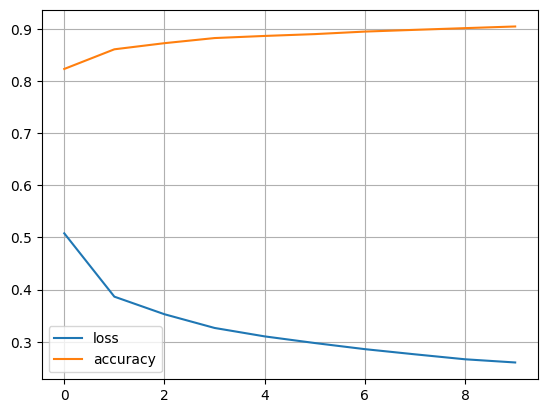

In [14]:
'''
Como no se pueden cambiar las neuronas en la capa de salida, una posible solución
es cambiando las neuronas pero en alguna de las capas ocultas.
'''
# Construir un nuevo modelo secuencial con un número diferente de neuronas en la capa oculta
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(64, activation='relu'),  # Cambiado de 128 a 64 neuronas
  keras.layers.Dense(10, activation='softmax')  # Mantener 10 neuronas para 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(training_images, training_labels, epochs=10)

# Evaluar el modelo con datos de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Graficar historial de entrenamiento usando pandas para convertirlo a DataFrame
pd.DataFrame(history.history).plot(grid=True)
plt.show()

La capa de salida tiene 10 neuronas porque hay 10 clases (categorías) diferentes en el dataset. Si cambiamos el número de neuronas en la capa de salida, el modelo ya no puede clasificar correctamente las imágenes en las 10 categorías originales. Cada neurona en la capa de salida representa una categoría y la salida de la neurona es la probabilidad de que la entrada pertenezca a esa categoría.


#### Explora los efectos de añadir otra capa entre la capa con 256 neuronas y la capa final con 10. Observa cómo esto podría afectar la capacidad del modelo para capturar características complejas de los datos de entrada y cómo afecta el rendimiento general del modelo:



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4760 - accuracy: 0.8294
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3600 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3237 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3001 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2835 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2684 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2542 - accuracy: 0.9033
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2439 - accuracy: 0.9081
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2347 - accuracy: 0.9109
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss:

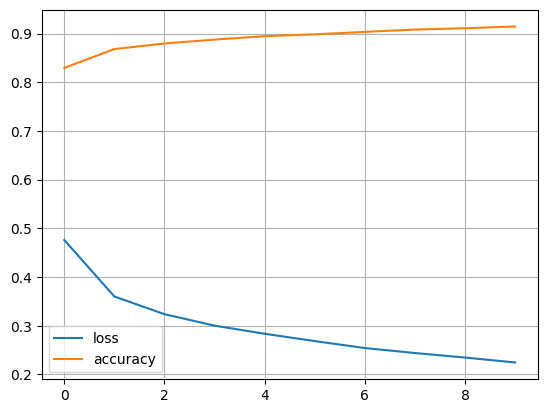

In [15]:
# Construir un nuevo modelo secuencial con una capa adicional
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation='relu'),  # Primera capa con 256 neuronas
  keras.layers.Dense(128, activation='relu'),  # Nueva capa añadida con 128 neuronas
  keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
history = model.fit(training_images, training_labels, epochs=10)

# Evaluar el modelo con datos de prueba
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Graficar historial de entrenamiento usando pandas para convertirlo a DataFrame
pd.DataFrame(history.history).plot(grid=True)
plt.show()

Añadir otra capa oculta puede aumentar la capacidad del modelo para aprender representaciones más complejas; sin embargo, esto también puede incrementar el tiempo de entrenamiento.

####  Considera el impacto de entrenar durante más o menos épocas. Experimenta con diferentes números de épocas y reflexiona sobre cómo esto afecta la mejora del modelo en términos de pérdida y precisión:

In [16]:
# Entrenar el modelo con un número menor de épocas
history_short = model.fit(training_images, training_labels, epochs=5)

# Evaluar el modelo con datos de prueba después de menos épocas
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Pérdida en el conjunto de prueba después de 5 épocas: {loss:.4f}")
print(f"Precisión en el conjunto de prueba después de 5 épocas: {accuracy:.4f}")

# Entrenar el modelo con un número mayor de épocas
history_long = model.fit(training_images, training_labels, epochs=15)

# Evaluar el modelo con datos de prueba después de más épocas
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Pérdida en el conjunto de prueba después de 5 épocas: {loss:.4f}")
print(f"Precisión en el conjunto de prueba después de 5 épocas: {accuracy:.4f}")

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2157 - accuracy: 0.9183
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2073 - accuracy: 0.9201
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1992 - accuracy: 0.9223
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1944 - accuracy: 0.9254
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8882
Pérdida en el conjunto de prueba después de 5 épocas: 0.3555
Precisión en el conjunto de prueba después de 5 épocas: 0.8882
Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1808 - accuracy: 0.9302
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1763 - accuracy: 0.9318
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1696 - accuracy: 0.9340
Epoch 4/15
1875/1875 [==============================] - 10s 

Entrenar el modelo durante más épocas generalmente mejora la precisión, pero también aumenta el riesgo de sobreajuste. Entrenar durante menos épocas puede resultar en un modelo que no ha aprendido adecuadamente los patrones de los datos de entrada.



#### Reflexiona sobre el impacto de eliminar la normalización de los datos antes del entrenamiento. Ejecuta el código sin normalización y observa cómo difieren los resultados:

In [17]:
# Cargar el conjunto de datos Fashion MNIST sin normalizar
(training_images_raw, training_labels_raw), (test_images_raw, test_labels_raw) = fmnist.load_data()

# Construir un nuevo modelo secuencial sin normalización de datos
model_raw = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model_raw.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento sin normalización
history_raw = model_raw.fit(training_images_raw, training_labels_raw, epochs=10)

# Evaluar el modelo con datos de prueba sin normalización
loss, accuracy = model_raw.evaluate(test_images_raw, test_labels_raw)
print("Pérdida en el conjunto de prueba sin normalización:", loss)
print("Precisión en el conjunto de prueba sin normalización:", accuracy)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.8233 - accuracy: 0.6826
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6709 - accuracy: 0.7645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5712 - accuracy: 0.8000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5406 - accuracy: 0.8092
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5153 - accuracy: 0.8194
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4989 - accuracy: 0.8272
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4939 - accuracy: 0.8322
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4837 - accuracy: 0.8341
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4737 - accuracy: 0.8401
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.6005 

Sin normalización, los valores de los píxeles pueden ser demasiado grandes, lo que puede llevar a un proceso de entrenamiento inestable y a un rendimiento ineficaz del modelo. La normalización convierte los valores de los píxeles en un rango más manejable, mejorando así la eficacia del entrenamiento.